<a href="https://colab.research.google.com/github/dspNetto/data_science_projects/blob/master/Project_Analyzing_Airbnb_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analysis of Airbnb Data

The **Airbnb** is considered the largest company in tourism accommodation market nowadays, but it owns no hotel, lodging, hostel and not even a single room.

The company provides a platform for hosts to accommodate guests with short-term lodging and tourism-related activities.

At the end of 2018, the startup founded 10 years ago had already **hosted more than 300 million people** worldwide, challenging all traditionals hotel chains.

All this work generated an unimaginable amount of data along years and an independent website named [Inside Airbnb](http://insideairbnb.com/index.html) uses some tools to collect and organize some of Airbnb public data.

In this notebook we will analyze some of the data of **Rio de Janeiro**, one of the most expensive cities in Brazil, and **Stockholm**, capital of Sweden, and see what insights we can extract from the raw data.

## Data Gathering

All data used in this study was collected in [Inside Airbnb](http://insideairbnb.com/index.html). The files being used are:

  * `listings.csv` - *Summary information and metrics for listings in Rio de Janeiro/Stockholm (good for visualisations)*.

In [27]:
#import the packages needed
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

%matplotlib inline

#import the file with data of Rio de Janeiro to a dataframe
df = pd.read_csv("http://data.insideairbnb.com/brazil/rj/rio-de-janeiro/2020-04-20/visualisations/listings.csv")

We cannot import Stockholm `.csv` file directly from [Inside Airbnb](http://insideairbnb.com/index.html) due an encode issue related to the special character *ä* present in the link of the file. Due that, I downloaded the file manually and uploaded in Dropbox to generate a new link. The shareble link provided by Dropbox comes with `dl=0` in the end of the link. It is set this way to you be able to visualize the data in your web browser, but we can change it to `dl=1` to we automatically download the file when we access the link.

In [28]:
#import the file with data of Stockholm to a dataframe
df2 = pd.read_csv("https://www.dropbox.com/s/90j0pxdemtu6fc7/listings-2.csv?dl=1")

## Data Analysis

After geting our data, we will quickly check the data structure and see what our dataset looks like. Let's see the first 3 rows of Rio de Janeiro and Stockholm dataframes.


In [3]:
#verify the 3 first rows of Rio de Janeiro dataframe
df.head(3)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,17878,Very Nice 2Br - Copacabana - WiFi,68997,Matthias,NaN,Copacabana,-22.96592,-43.17896,Entire home/apt,218,5,251,2020-04-06,2.11,1,0
1,21280,Renovated Modern Apt. Near Beach,81163,Jules,NaN,Ipanema,-22.98467,-43.19611,Entire home/apt,422,5,94,2020-03-22,1.25,1,69
2,25026,Beautiful Modern Decorated Studio in Copa,102840,Viviane,NaN,Copacabana,-22.97712,-43.19045,Entire home/apt,158,7,238,2020-02-15,1.98,3,95


In [4]:
#verify the 3 first rows of Stockholm dataframe
df2.head(3)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,155220,"Stockholm, new spacoius villa",746396,Madeleine,NaN,Skarpnäcks,59.24667,18.17799,Entire home/apt,1203,3,0,NaN,NaN,2,0
1,155685,Hornstull with water view!,748592,Robert,NaN,Södermalms,59.31535,18.03277,Entire home/apt,3257,4,22,2015-12-01,0.21,1,0
2,164448,Double room in central Stockholm with Wi-Fi,784312,Li,NaN,Södermalms,59.31268,18.06258,Private room,601,3,322,2020-01-29,3.02,2,169


### Variables Dictionary

To support our analysis it is good to have a better understanding of the variables in our dataset.

  * `id` - number generated by Airbnb to identify property
  * `name` - description of property announment in Airbnb
  * `host_id` - number generated by Airbnb to identify host
  * `neighbourhood` - property neighbourhood name
  * `latitude` - property latitude
  * `longitude` - property longitude
  * `room_type` - specify the kind of room is offered
  * `price` - the price charged by the host per night in BRL
  * `minimum_nights` - informs the minimum number of nights that the host wants to offer the property
  * `last_review` - informs the date of last review published by the guest
  * `review_per_month` - shows the mean amount of review the property receives per month
  * `calculated_host_listing_count` - quantity of properties that the same host owns
  * `availability_365` - number of available days in a year

It's important to highlight that the variable `price` is defined in local currency of each city. It means we will need to convert the values to compare prices between the cities.

### Quality of the Dataset

Before diving into the data we will get more details about the data structure to evaluate the dataset quality and perform some changes to make the data ready to be analyzed.

#### _How many variables and how many inputs our dataset has? What type of data we have in each variable?_

Let's start checking the amount of data in the dataset and the type of data in each variable.

In [5]:
#show the number of inputs (rows) in Rio de Janeiro dataframe and in Stockholm
print("Rio de Janeiro inputs: {}".format(df.shape[0]))
print("Stockholm inputs: {}\n" .format(df2.shape[0]))

#show the number of varialbles (columns) in the files (both dataframes have the same amount of variables/columns)
print("Variables: {}\n".format(df.shape[1]))

#check the data type of the 5 first entries of the dataset
print("Types:\n")
display(df.dtypes)

#shape returns the amount of columns and row in the dataset
#shape[0] returns the amount of rows
#shape[1] returns the amount of columns

Rio de Janeiro inputs: 35870
Stockholm inputs: 7432

Variables: 16

Types:



id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

#### _What is the amount of null values in our dataset?_
The quality of a dataset is directly linked to the amount of null values we have. We need to understand if the amount of null value is relevant compared to the total amount of data we have.

In [6]:
#ordering the null valeus percentage of each variable in Rio de Janeiro dataframe
print("Null values (%) - Rio de Janeiro dataframe:\n")
((df.isnull().sum() / df.shape[0]) * 100).sort_values(ascending=True)

#isnull() informs if each cell has a content or not
#isnull().sum() sums the null cells per column
#(df.isnull().sum() / df.shape[0]) divides the value above by the number of columns returning the percentage

Null values (%) - Rio de Janeiro dataframe:



id                                  0.000000
host_id                             0.000000
neighbourhood                       0.000000
latitude                            0.000000
longitude                           0.000000
room_type                           0.000000
price                               0.000000
minimum_nights                      0.000000
number_of_reviews                   0.000000
calculated_host_listings_count      0.000000
availability_365                    0.000000
host_name                           0.013939
name                                0.161695
last_review                        41.165319
reviews_per_month                  41.165319
neighbourhood_group               100.000000
dtype: float64

In [7]:
#ordering the null valeus percentage of each variable in Stockholm dataframe
print("Null values (%) - Stockholm dataframe:\n")
((df2.isnull().sum() / df2.shape[0]) * 100).sort_values(ascending=True)

Null values (%) - Stockholm dataframe:



id                                  0.000000
host_id                             0.000000
host_name                           0.000000
neighbourhood                       0.000000
latitude                            0.000000
longitude                           0.000000
room_type                           0.000000
price                               0.000000
minimum_nights                      0.000000
number_of_reviews                   0.000000
calculated_host_listings_count      0.000000
availability_365                    0.000000
name                                0.336383
last_review                        21.071044
reviews_per_month                  21.071044
neighbourhood_group               100.000000
dtype: float64

We can see that there is no input for variable `neighbourhood_group`in Rio de Janeiro and Stockholm dataframes. We can simply exclude this variable of the analysis.

We can also see that variables `last_review`and `reviews_per_month`have a relevant amount of inputs missing

#### *What type of distribution we have in each variable?*

I will plot the histogram of each variable to check their distribution

Histograms of Rio de Janeiro:



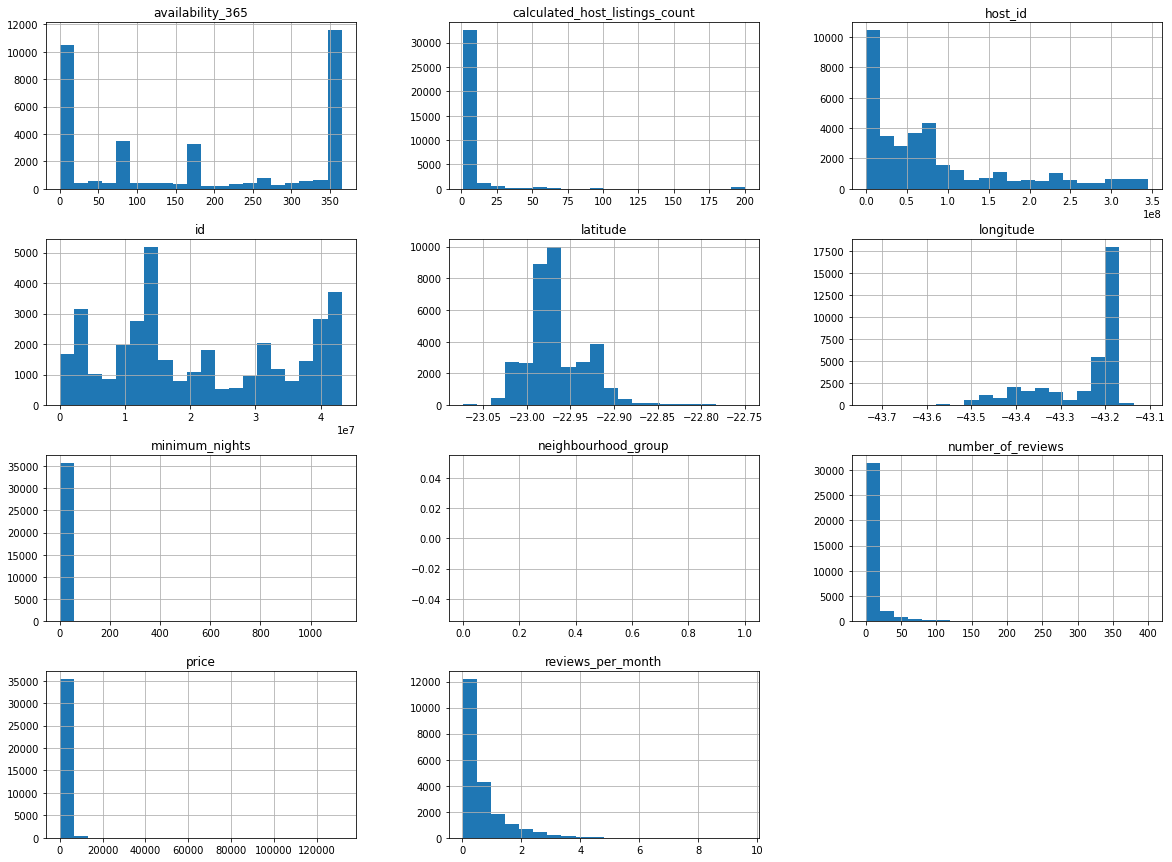

In [8]:
#plot the histogram graph of each variable in Rio de Janeiro dataframe
print("Histograms of Rio de Janeiro:\n")
df.hist(bins=20, figsize=(20,15));

#bins defines the amount of bars in the histogram
#figsize defines the size of the graph

Histograms of Stockholm:



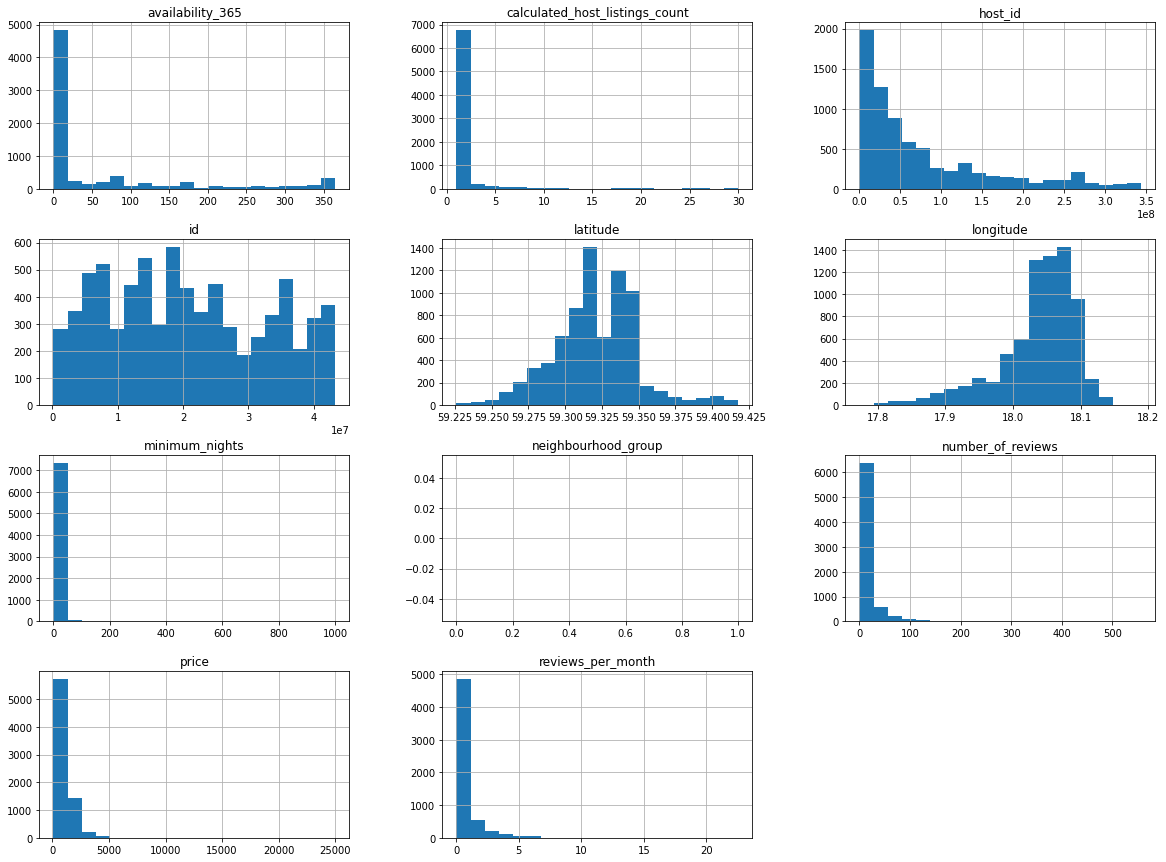

In [9]:
#plot the histogram graph of each variable in Stockholm dataframe
print("Histograms of Stockholm:\n")
df2.hist(bins=20, figsize=(20,15));

#### *Is there any _outlier_?*

Based on the histrogram distribution above, we have some evidences of *outliers*. 

Evaluating the histogram of variable `price`, we see some inputs where the host charges more than R$ 120,000.00 per night in Rio de Janeiro and more than 25,000 kr per night in Stockholm. Evaluating variable `minimum_nights`, we see some inputs where the host request more than 1000 as minimum amout of nights in Rio de Janeiro and in Stockholm. 

These odd cases above do not represent the normal behaviour of the data and only distorts the distribution making it harder to evaluate. To confirm that, we can use 2 quick methods to detect the *outliers*:

  * Statistic summary through `describe()`method
  * To plot `boxplots`for the specific variable

##### **Statistic summary**

In [10]:
#return statistic data (in Rio de Janeiro dataframe) of the selected variable through describe() method
print("Statistic summary of Rio de Janeiro:\n")
df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']].describe()

Statistic summary of Rio de Janeiro:



,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,35870.000000,35870.000000,35870.000000,21104.000000,35870.000000,35870.000000
mean,753.686367,4.781851,9.822972,0.652248,6.613995,180.371815
std,2229.366334,22.471085,25.827647,0.823388,22.769663,152.510778
min,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,158.000000,1.000000,0.000000,0.130000,1.000000,0.000000
50%,298.000000,2.000000,1.000000,0.340000,1.000000,178.000000
75%,632.000000,4.000000,6.000000,0.830000,3.000000,363.000000
max,131727.000000,1123.000000,399.000000,9.570000,200.000000,365.000000


Looking the statistic summary of Rio de Janeiro above we can see that the variable `price` has 75% of values below **632**, but it has a maximum value of **131727**. We observe the same pattern in the other variables (including `minimum_nights`that maximum value exceeds 365 days in a year).

In [11]:
#return statistic data (in Stockholm dataframe) of the selected variable through describe() method
print("Statistic summary of Stockholm:\n")
df2[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']].describe()

Statistic summary of Stockholm:



,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,7432.000000,7432.000000,7432.000000,5866.000000,7432.000000,7432.000000
mean,1099.057858,5.650161,15.991927,0.730066,1.851453,61.320640
std,995.340804,23.260776,36.454988,1.171884,3.479181,107.167649
min,90.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,611.000000,2.000000,1.000000,0.120000,1.000000,0.000000
50%,902.000000,3.000000,5.000000,0.320000,1.000000,0.000000
75%,1303.000000,4.000000,15.000000,0.780000,1.000000,87.000000
max,25003.000000,1000.000000,557.000000,22.550000,30.000000,365.000000


Stockholm seems to be better but we still seeing some *outliers* evidences.

##### **Boxplot through Pandas vs Plotly**
Boxplot is one of the best graphical way to spot *outliers* in your data. If you want to understand more how it works, check this article made by [Towards Data Science](https://towardsdatascience.com/understanding-boxplots-5e2df7bcbd51).

We will first analyze the boxplot created by tools in Pandas library that most of the times can cover our needs.

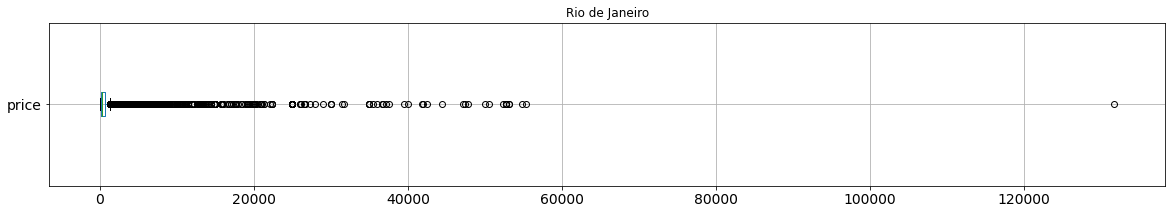

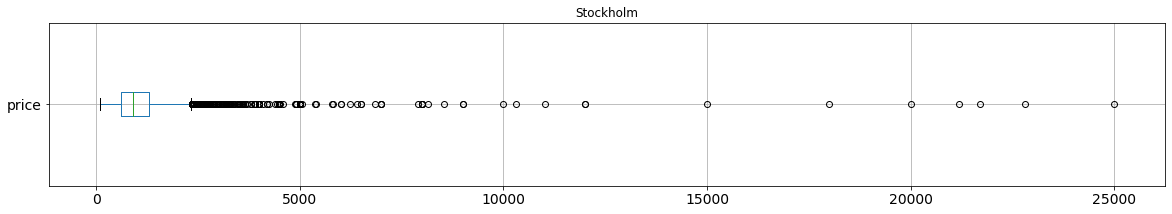

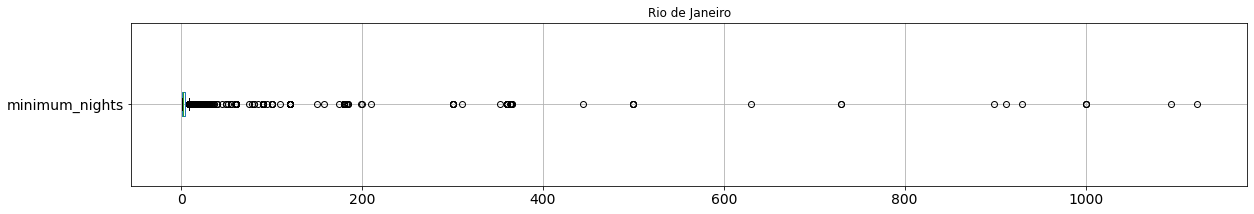

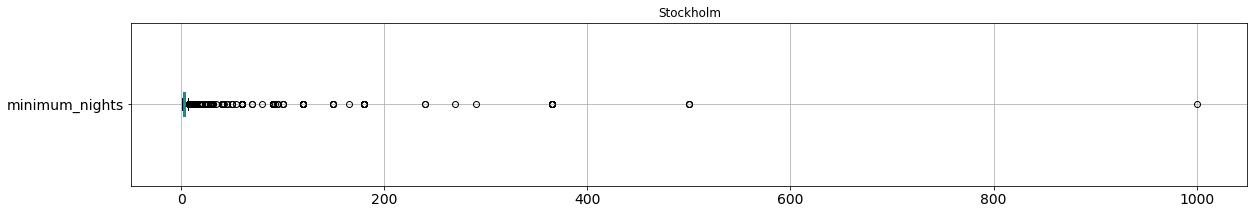

In [12]:
#plot the boxplot of variable price of Rio de Janeiro and Stockholm
df.price.plot(kind='box', vert=False, figsize=(20,3), grid=True, fontsize=14, title="Rio de Janeiro");
plt.show() #this command is to plot the graph
df2.price.plot(kind='box', vert=False, figsize=(20,3), grid=True, fontsize=14, title="Stockholm");
plt.show()

#plot the boxplot of variable minimum nights of Rio de Janeiro and Stockholm
df.minimum_nights.plot(kind='box', vert=False, figsize=(20,3), grid=True, fontsize=14, title="Rio de Janeiro");
plt.show()
df2.minimum_nights.plot(kind='box', vert=False, figsize=(20,3), grid=True, fontsize=14, title="Stockholm");
plt.show()

Every circle we see in the boxplots above is an *outlier* in our dataframe. The amout of *outliers* and their extreme values make it harder to see the characteristics of our boxplot so we do not know where exactly is the threashold where we start seeming *outliers*. To find this threashold we will use the tools in Plotly library.

In [13]:
#alternative way to show the box plot through plotly library

#plot the boxplot of variable price in Rio de Janeiro dataframe and show the quantity of values above upper fence
print("Rio de Janeiro")
fig = px.box(df, y="price", )
fig.show()
print("{} inputs above R$ 1340.00" .format(len(df[df.price > 1340])))
print("{:.4}%" .format((len(df[df.price > 1340]) / df.shape[0]) * 100))
#len show the amout of entries of the specified variable

#plot the boxplot of variable price in Stockholm dataframe and show the quantity of values above upper fence
print("\nStockholm")
fig2 = px.box(df2, y="price")
fig2.show()
print("{} inputs above 2335.00 kr" .format(len(df2[df2.price > 1340])))
print("{:.4}%" .format((len(df2[df2.price > 1340]) / df2.shape[0]) * 100))

#plot the boxplot of variable minimum_nights in Rio de Janeiro dataframe and show the quantity of values above upper fence
print("\nRio de Janeiro")
fig3 = px.box(df, y="minimum_nights", )
fig3.show()
print("{} inputs above 8 nights" .format(len(df[df.minimum_nights > 8])))
print("{:.4}%" .format((len(df[df.minimum_nights > 8]) / df.shape[0]) * 100))

#plot the boxplot of variable price in Stockholm dataframe and show the quantity of values above upper fence
print("\nStockholm")
fig4 = px.box(df2, y="minimum_nights")
fig4.show()
print("{} inputs above 7 nights" .format(len(df2[df2.minimum_nights > 7])))
print("{:.4}%" .format((len(df2[df2.minimum_nights > 7]) / df2.shape[0]) * 100))

Rio de Janeiro


3736 inputs above R$ 1340.00
10.42%

Stockholm


1724 inputs above 2335.00 kr
23.2%

Rio de Janeiro


2753 inputs above 8 nights
7.675%

Stockholm


534 inputs above 7 nights
7.185%


Now we can see the *upper fence* and conclude:

  * Prices above **R$ 1340.00** are *outliers* in Rio de Janeiro and they represent 10.42% of the total amount of inputs.
  * Prices above **2335.00 kr** are *outliers* in Stockholm and they represent 23.2% of the total amount of inputs.
  * Properties requesting a minimum of **9 nights** or more are *outliers* in Rio de Janeiro and they represent 7.68% of the total amount of inputs.
  * Properties requesting a minimum of **8 nights** or more are *outliers* in Stockholm and they represent 7.19% of the total amount of inputs.

##### Cleaning the histograms

We could confirm that some variables have a relevant amount of _outliers_ affecting the analysis. The next step would be to remove these _outliers_ and plot again the histograms. I will do that on `price`and `minimum_nights` variables which are the most interesting numeric data to evaluate.

Rio de Janeiro


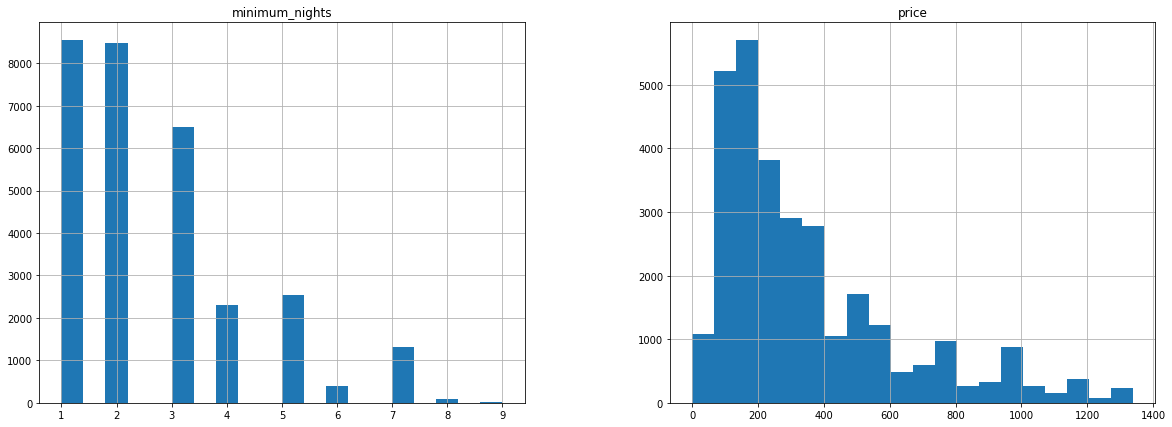


Stockholm


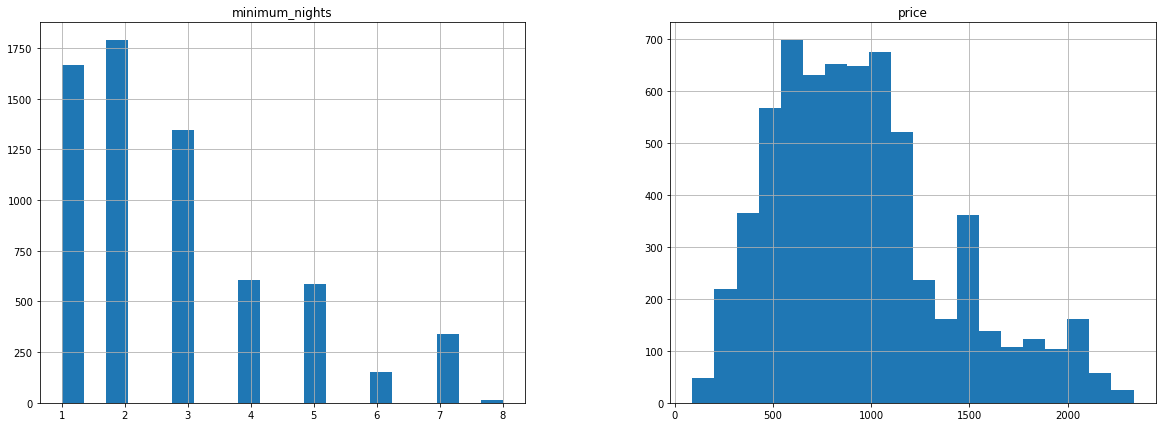

In [14]:
#copy the data to a new datafram and then remove the outliers
df_clean = df.copy()
df2_clean = df2.copy()

#remove the rows with `price` more than 1340/2335 and `minimum_nights` more than 9/8 in Rio de Janeiro/Stockholm (outliers)
df_clean.drop(df_clean[df_clean.price > 1340].index, axis=0, inplace=True) 
df_clean.drop(df_clean[df_clean.minimum_nights > 9].index, axis=0, inplace=True)
df2_clean.drop(df2_clean[df2_clean.price > 2335].index, axis=0, inplace=True)
df2_clean.drop(df2_clean[df2_clean.minimum_nights > 8].index, axis=0, inplace=True)

#remove `neighbourhood_group` since it is empty
df_clean.drop('neighbourhood_group', axis=1, inplace=True)
df2_clean.drop('neighbourhood_group', axis=1, inplace=True)

#plot new histograms
print("Rio de Janeiro")
df_clean[['price', 'minimum_nights']].hist(bins=20, figsize=(20,7));
plt.show()
print("\nStockholm")
df2_clean[['price', 'minimum_nights']].hist(bins=20, figsize=(20,7));


Now we can clearly see the proper shape of `price` and `minimum_nights` histograms.

### Correlations

The correlation analysis is important to show the relashionship level between different variables. This way we can identify which variables varies the same way or in the same proportion.

This relationship can be measured and we can define its intensity. To identify the correlation between variables we will:

  * Create a correlation matrix
  * Generate a heatmap based on this matrix, using library `seaborn`

In [15]:
#creating correlation matrix with specific variables)
corr = df_clean[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']].corr()
print("Rio de Janeiro")
display(corr)
print("\nStockholm")
corr2 = df2_clean[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']].corr()
display(corr)

Rio de Janeiro


,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,0.185485,-0.154036,-0.161897,0.059335,-0.019771
minimum_nights,0.185485,1.000000,-0.055641,-0.139955,-0.000526,-0.049887
number_of_reviews,-0.154036,-0.055641,1.000000,0.643415,-0.029654,0.054507
reviews_per_month,-0.161897,-0.139955,0.643415,1.000000,-0.014075,-0.016604
calculated_host_listings_count,0.059335,-0.000526,-0.029654,-0.014075,1.000000,0.074047
availability_365,-0.019771,-0.049887,0.054507,-0.016604,0.074047,1.000000



Stockholm


,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,0.185485,-0.154036,-0.161897,0.059335,-0.019771
minimum_nights,0.185485,1.000000,-0.055641,-0.139955,-0.000526,-0.049887
number_of_reviews,-0.154036,-0.055641,1.000000,0.643415,-0.029654,0.054507
reviews_per_month,-0.161897,-0.139955,0.643415,1.000000,-0.014075,-0.016604
calculated_host_listings_count,0.059335,-0.000526,-0.029654,-0.014075,1.000000,0.074047
availability_365,-0.019771,-0.049887,0.054507,-0.016604,0.074047,1.000000


Rio de Janeiro


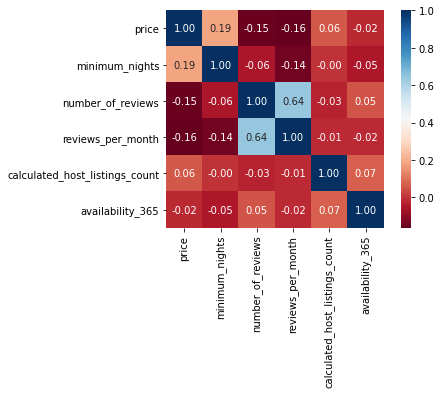


Stockholm


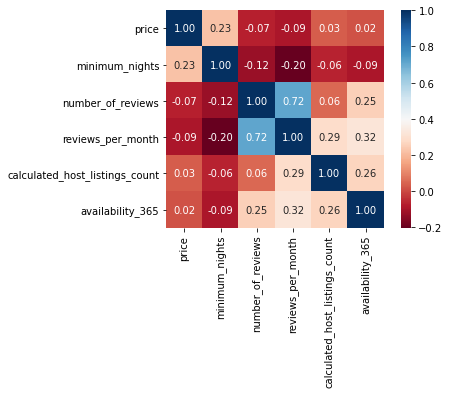

In [16]:
print("Rio de Janeiro")
sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True);
plt.show()
print("\nStockholm")
sns.heatmap(corr2, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True);

The headmaps show no strong correlation between the variables in the dataset except the `reviews_per_month` and `numbers_of_reviews`, but this is not relevant.

### Looking for Insights

We can start looking for some interesting info in the dataset and even compare both cities.

#### Most wanted property type

The variable `room_type` specify the type of property being offered by the host in Airbnb. The we can find options like an entire house/apartment, just a room in an house/apartment or even a shared room.

See below how this variable is distributed in Rio de Janeiro.

In [17]:
#shows the amount of properties available by type in Rio de Janeiro
print("Rio de Janeiro\n")
df_clean.room_type.value_counts()

Rio de Janeiro



Entire home/apt    20616
Private room        8655
Shared room          721
Hotel room           158
Name: room_type, dtype: int64

In [18]:
#shows the amount of properties available by type in Stockholm
print("Stockholm\n")
df2_clean.room_type.value_counts()

Stockholm



Entire home/apt    5262
Private room       1142
Shared room          52
Hotel room           42
Name: room_type, dtype: int64

In [19]:
#shows the same above but in percentage in Rio de Janeiro
print("Rio de Janeiro\n")
df_clean.room_type.value_counts() / df_clean.shape[0]

Rio de Janeiro



Entire home/apt    0.683781
Private room       0.287065
Shared room        0.023914
Hotel room         0.005240
Name: room_type, dtype: float64

In [20]:
#shows the same above but in percentage in Stockholm
print("Stockholm\n")
df2_clean.room_type.value_counts() / df2_clean.shape[0]

Stockholm



Entire home/apt    0.809788
Private room       0.175746
Shared room        0.008002
Hotel room         0.006464
Name: room_type, dtype: float64

#### Most expensive area

The dataset allow us to evaluate the most expensive neighbourhood according Airbnb. To do that, we can use the function `groupby()` to group the data by neighbourhood and then check the mean price. We will evaluate the cities separated starting by Rio de Janeiro.

In [21]:
#group by neighbourhood using `groupby()` then check the mean price of each neighbourhood with `.price.mean()` then sort the data with `.sort_values()` and limit the data to 10 lines shown with `[:10]`
df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:10]

neighbourhood
Vaz Lobo                  649.000000
Ricardo de Albuquerque    601.200000
Lagoa                     497.623762
Deodoro                   474.000000
Inhoaíba                  466.000000
Leblon                    462.512048
Ipanema                   442.127791
Pedra de Guaratiba        441.133333
Pavuna                    436.000000
Barra da Tijuca           431.850787
Name: price, dtype: float64

We can see that the neighbourhoods Vaz Lobos, Ricardo de Albuquerque, and Engenheiro Leal shows a mean price higher than Barra da Tijuca and Leblon.

Someone that does not know Rio de Janeiro will not realise that this information does not match with reality.

LetsWe may check how many entries we have in these first 3 neighbourhoods to evaluate the quality of data

In [22]:
#show the amout of data entries with neighbourhood set to `Vaz Lobo`
print("Inputs in Vaz Lobo:")
print(df_clean[df_clean.neighbourhood == "Vaz Lobo"].shape[0])

#show the amout of data entries with neighbourhood set to `Ricardo de Albuquerque`
print("\nInputs in Ricardo de Albuquerque:")
print(df_clean[df_clean.neighbourhood == "Ricardo de Albuquerque"].shape[0])

#show the amout of data entries with neighbourhood set to `Engenheiro Leal`
print("\nInputs in Engenheiro Leal:")
print(df_clean[df_clean.neighbourhood == "Engenheiro Leal"].shape[0])

Inputs in Vaz Lobo:
2

Inputs in Ricardo de Albuquerque:
5

Inputs in Engenheiro Leal:
1


We can see that the amount of data available related to these neighbourhoods is not enough to analyze when we have a total of 35870.

Since we have `latitude` and `longitude` variables for each entry, we can evaluate the prices according the geographic location.

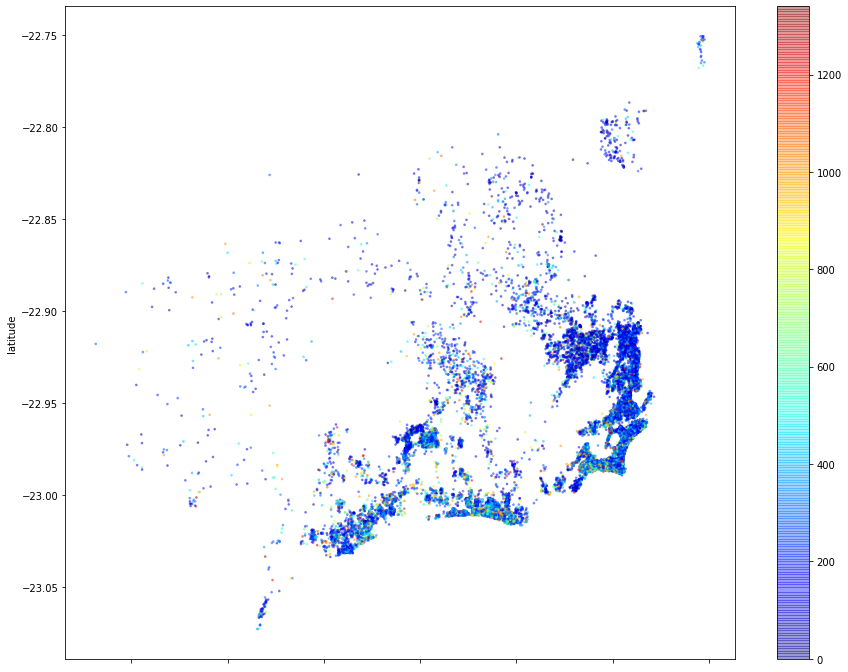

In [23]:
df_clean.plot(kind="scatter", x='longitude', y='latitude', alpha=0.4, c=df_clean['price'], s=3, cmap=plt.get_cmap('jet'), figsize=(15,12));

Let's do the same analysis to Stockholm

In [24]:
#group by neighbourhood using `groupby()` then check the mean price of each neighbourhood with `.price.mean()` then sort the data with `.sort_values()` and limit the data to 10 lines shown with `[:10]`
df2_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:10]

neighbourhood
Norrmalms                 1093.858942
Södermalms                1072.756362
Östermalms                1007.519231
Kungsholmens               942.756510
Bromma                     921.755287
Älvsjö                     859.660000
Skarpnäcks                 841.153094
Enskede-Årsta-Vantörs      824.204239
Hägersten-Liljeholmens     804.393388
Farsta                     795.064171
Name: price, dtype: float64

I'm not familiar with Stockholm neighbourhoods but we can check the top 5 neighbourhoods to confirm the confidence level of this list.

In [25]:
print("Inputs in Norrmalms:")
print(df2_clean[df2_clean.neighbourhood == "Norrmalms"].shape[0])

print("\nInputs in Södermalms:")
print(df2_clean[df2_clean.neighbourhood == "Södermalms"].shape[0])

print("\nInputs in Östermalms:")
print(df2_clean[df2_clean.neighbourhood == "Östermalms"].shape[0])

print("\nInputs in Kungsholmens:")
print(df2_clean[df2_clean.neighbourhood == "Kungsholmens"].shape[0])

print("\nInputs in Bromma:")
print(df2_clean[df2_clean.neighbourhood == "Bromma"].shape[0])

Inputs in Norrmalms:
794

Inputs in Södermalms:
1847

Inputs in Östermalms:
572

Inputs in Kungsholmens:
768

Inputs in Bromma:
331


We can see that the confidence level of the top 5 in Stockholm is higher than in Rio de Janeiro. Even so, let's plot the prices according geographic location.

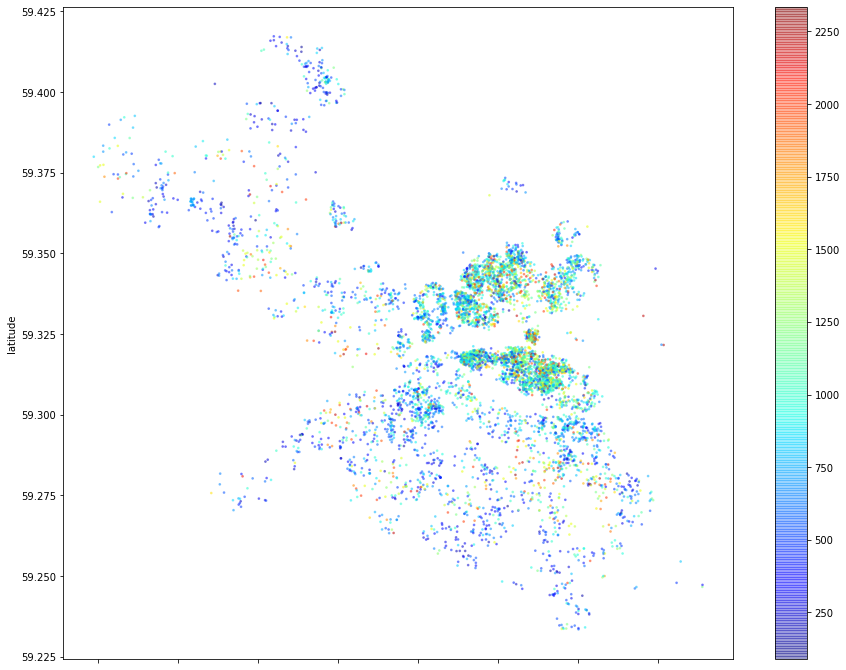

In [26]:
df2_clean.plot(kind="scatter", x='longitude', y='latitude', alpha=0.4, c=df2_clean['price'], s=3, cmap=plt.get_cmap('jet'), figsize=(15,12));

#### Most expensive city
Using the exchange rate of June 20th (1 SEK = 0.56 BRL), we will convert the variable `price` of Stockholm to compare with the price of Rio de Janeiro.

Stockholm



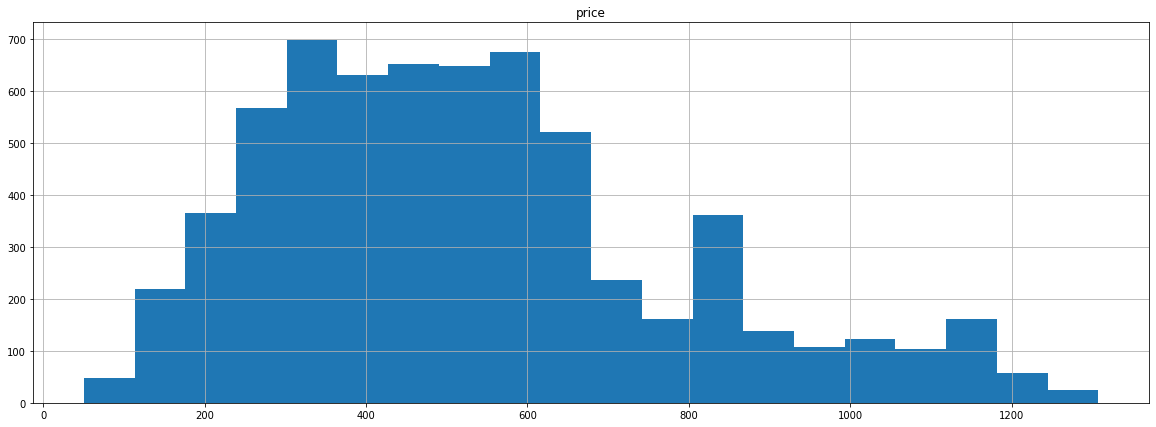

,price
count,6498.000000
mean,533.059588
std,253.131630
min,50.400000
25%,336.560000
50%,505.120000
75%,673.680000
max,1307.600000


In [35]:
#convert swedish currency to compare with brazilian currency
df2_convert = df2_clean.copy()
df2_convert['price'] = df2_convert['price'] * 0.56

#plot histogram and statistic data
print("Stockholm\n")
df2_convert[['price']].hist(bins=20, figsize=(20, 7))
plt.show()
df2_convert[['price']].describe()

Rio de Janeiro



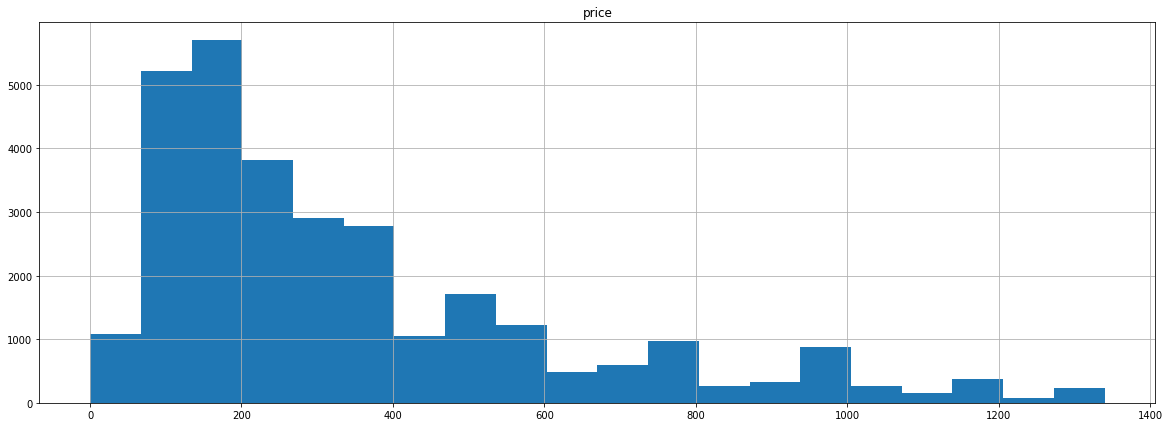

,price
count,30150.000000
mean,350.860796
std,281.076975
min,0.000000
25%,148.000000
50%,250.000000
75%,471.000000
max,1340.000000


In [37]:
print("Rio de Janeiro\n ")
df_clean[['price']].hist(bins=20, figsize=(20, 7))
plt.show()
df_clean[['price']].describe()